## **CNN with MNIST Data**

In [115]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline

In [116]:
from tensorflow.keras.datasets.mnist import load_data    # To load the MNIST digit dataset

(X_train, y_train) , (X_test, y_test) = load_data()      # Loading data

In [117]:
load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [118]:
len(load_data())

2

In [119]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [120]:
# Checking the shape of one image
X_train[5].shape

(28, 28)

In [121]:
X_train[5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [122]:
X_train[7].shape

(28, 28)

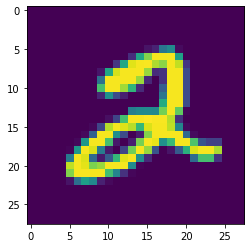

In [123]:
plt.imshow(X_train[5]);
# plt.matshow(X_train[5]);

In [124]:
y_train[5]

2

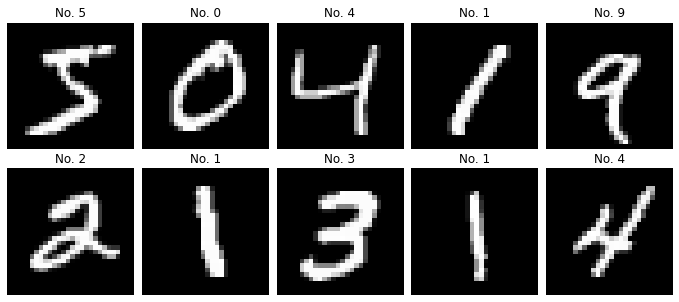

In [125]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.15}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow( X_train[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % y_train[image_index])
plt.show()
plt.close()

## Data Preprocessing

In [126]:
X_train[5].min()

0

In [127]:
X_train[5].max()

255

In [128]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# manuel olarak scale etmiş olduk.

In [129]:
X_train[5].min()

0.0

In [130]:
X_train[5].max()

1.0

In [131]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

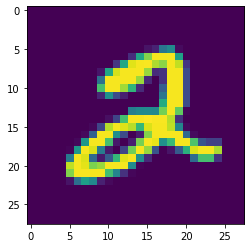

In [132]:
plt.imshow(X_train[5])

In [133]:
X_train.shape

(60000, 28, 28)

In [134]:
X_train.shape[0]

60000

In [135]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# modelimi oluşturmadan önce matrislerin her birini 28, 28, 1 moduna çevirdim. burada 1, siyah beyaz olduğunu ifade ediyor. 

In [136]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [137]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [138]:
y_train[:10]

# 0 dan 9 a kadar 10 farklı class ım var.
# ama şuan bunlar class değil, rakam. aşağıda bunları categoriye çevireceğim.

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [139]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [140]:
y_train.shape

(60000,)

In [141]:
y_test.shape

(10000,)

In [143]:
from tensorflow.keras.utils import to_categorical

In [145]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [146]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

# modelimin ihtiyacı olacak layerlerı import ettim. (Dense, Conv2D, MaxPool2D, Flatten)

In [150]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu',))  
  # filters, biz image'e bağlı olarak biz belirliyoruz. kernel size'ı da aynı şekilde.

model.add(MaxPool2D(pool_size=(2, 2))) # pool_size belirlemezsen otomatik 2,2 pool oluşturup verileri öyle çeker.

model.add(Flatten())   # matrisleri vektöre dönüştürecek.

model.add(Dense(128, activation='relu'))  # nöron sayısı 128 olsun. activation relu olsun. model Dence'te eğitilecek

model.add(Dense(10, activation='softmax')) 
# çıkış için 10 nöron olsun. çıkış activation u softmax olsun (classification yaptığımız için softmax'ı kullanmak zorundayız)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Conv2D layer'ı için: 3'e 3'lük 32 filtre koy. input_shape 28,28,1 olsun. dedim

# genelde 28 lik, 32 lik fotoğraflar için 2,2 pool idealdir. MaxPool2D layer ı için 2,2 belirledik.


**A sample example showing the conversion of 3D data to 2D**
![3Dto2D](https://dphi-courses.s3.ap-south-1.amazonaws.com/Deep+Learning+Bootcamp/3D+to++2D.png)

In [151]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


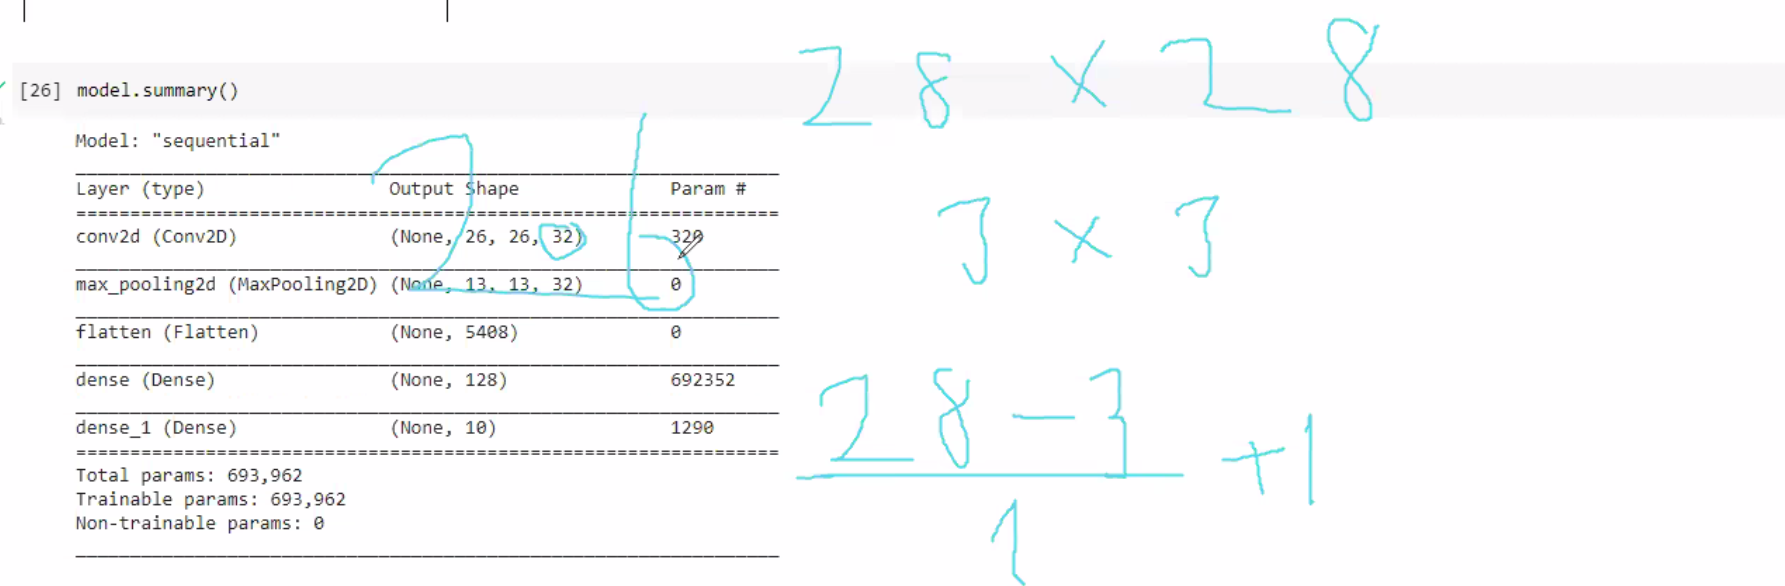

In [152]:
from tensorflow.keras.callbacks import EarlyStopping

In [153]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [154]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])


Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1470 - accuracy: 0.9560 - val_loss: 0.0686 - val_accuracy: 0.9790
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0513 - accuracy: 0.9845 - val_loss: 0.0561 - val_accuracy: 0.9810
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0326 - accuracy: 0.9896 - val_loss: 0.0431 - val_accuracy: 0.9861
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0215 - accuracy: 0.9934 - val_loss: 0.0364 - val_accuracy: 0.9882
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0147 - accuracy: 0.9951 - val_loss: 0.0431 - val_accuracy: 0.9869
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0104 - accuracy: 0.9969 - val_loss: 0.0449 - val_accuracy: 0.9876


In [155]:
model.metrics_names

['loss', 'accuracy']

In [156]:
model.history.history

{'loss': [0.14702095091342926,
  0.05134591460227966,
  0.03256871551275253,
  0.02152036689221859,
  0.014702178537845612,
  0.010371359065175056],
 'accuracy': [0.9559999704360962,
  0.9845499992370605,
  0.9895666837692261,
  0.9934333562850952,
  0.9951333403587341,
  0.996916651725769],
 'val_loss': [0.06862366199493408,
  0.05605499446392059,
  0.043129678815603256,
  0.036414097994565964,
  0.04312073439359665,
  0.04485538229346275],
 'val_accuracy': [0.9789999723434448,
  0.9810000061988831,
  0.9861000180244446,
  0.9882000088691711,
  0.9868999719619751,
  0.9876000285148621]}

In [159]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.147021,0.956000,0.068624,0.9790
1,0.051346,0.984550,0.056055,0.9810
2,0.032569,0.989567,0.043130,0.9861
3,0.021520,0.993433,0.036414,0.9882
4,0.014702,0.995133,0.043121,0.9869


In [160]:
summary.tail()

,loss,accuracy,val_loss,val_accuracy
1,0.051346,0.984550,0.056055,0.9810
2,0.032569,0.989567,0.043130,0.9861
3,0.021520,0.993433,0.036414,0.9882
4,0.014702,0.995133,0.043121,0.9869
5,0.010371,0.996917,0.044855,0.9876


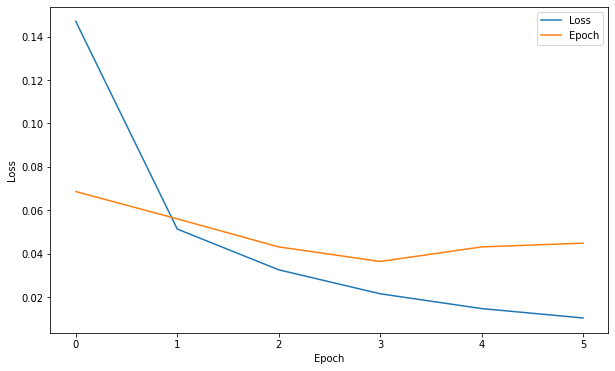

In [169]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss)
plt.plot(summary.val_loss)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss", "Epoch"])

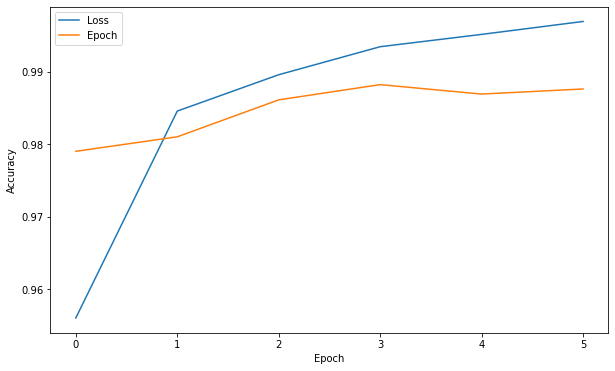

In [170]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy)
plt.plot(summary.val_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Loss", "Epoch"])


In [162]:
print(model.evaluate(X_test,Y_test,verbose=1))

313/313 [==============================] - 1s 3ms/step - loss: 0.0449 - accuracy: 0.9876
[0.04485538229346275, 0.9876000285148621]


In [165]:
from sklearn.metrics import classification_report,confusion_matrix

In [166]:
preds = model.predict(X_test)

In [167]:
preds

# preds te olasılıklar vardır. burada her bir clas'ın ihtimali var. burada 10 class var. ve çıkıştaki değer en büyük değer olacaktır. 

array([[1.19774863e-13, 2.96582793e-11, 1.48463830e-09, ...,
        9.99999881e-01, 6.69459821e-10, 1.54028044e-08],
       [1.04865006e-09, 7.15694748e-09, 1.00000000e+00, ...,
        1.78564744e-14, 1.08492951e-10, 4.66400939e-14],
       [7.94833431e-06, 9.99458253e-01, 1.56329625e-05, ...,
        1.61536736e-04, 1.59758041e-04, 3.78222268e-07],
       ...,
       [2.70228868e-16, 1.32519811e-11, 3.34187972e-13, ...,
        6.54957091e-07, 2.60542095e-07, 1.89376465e-06],
       [5.66171349e-15, 5.97368821e-16, 5.89527043e-16, ...,
        3.99969889e-15, 1.13426695e-05, 2.08920641e-11],
       [8.43646238e-14, 1.60953201e-17, 1.15339333e-14, ...,
        6.27283057e-22, 3.23762822e-11, 5.24932575e-16]], dtype=float32)

In [171]:
preds[0]

array([1.19774863e-13, 2.96582793e-11, 1.48463830e-09, 6.68262601e-08,
       1.99297024e-12, 1.21278890e-11, 1.02192226e-17, 9.99999881e-01,
       6.69459821e-10, 1.54028044e-08], dtype=float32)

In [174]:
predictions= np.argmax(preds, axis=1)

# pred ihtimallerinin en büyüğünü aldık. çıktı bu class olacak.

In [175]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [176]:
len(predictions)

10000

In [68]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.98      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
print(confusion_matrix(y_test, predictions))

[[ 977    1    0    1    0    0    0    0    1    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [   1    2 1018    1    0    0    0    5    4    1]
 [   0    0    3 1000    0    3    0    0    3    1]
 [   0    0    1    0  970    0    2    0    2    7]
 [   1    0    1    6    0  883    1    0    0    0]
 [   9    4    0    0    1    2  939    0    3    0]
 [   1    2    7    1    0    0    0 1012    1    4]
 [   4    0    4    1    0    0    0    1  958    6]
 [   0    3    0    1    6    4    0    1    0  994]]


In [177]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04485538229346275
Test accuracy: 0.9876000285148621


In [184]:
X_test[0].shape

(28, 28, 1)

In [178]:
my_number = X_test[0]

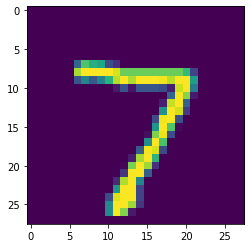

In [179]:
plt.imshow(my_number.reshape(28,28))

# örneğimi image olarak görebilmek için başlangıçtaki formuna yani 28,28 e çevirdim.

In [180]:
model.predict(my_number.reshape(1,28,28,1))

array([[1.1977486e-13, 2.9658394e-11, 1.4846440e-09, 6.6826260e-08,
        1.9929702e-12, 1.2127889e-11, 1.0219301e-17, 9.9999988e-01,
        6.6945982e-10, 1.5402835e-08]], dtype=float32)

In [ ]:
# SHAPE --> (num_images,width,height,color_channels)
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=1)

array([7])

In [ ]:
model.save("cnn-1.h5")